In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


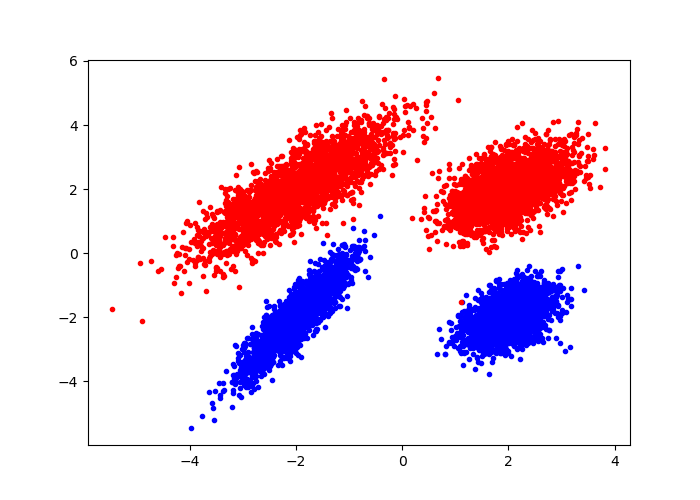

In [27]:
from sklearn.datasets import make_classification
X,y = make_classification(
    n_samples=10_000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=2,
    class_sep=2,
    flip_y=0,
    scale=1.,
    random_state=61658,
)
X = pd.DataFrame(X,columns=['feat_1','feat_2'])
y = pd.Series(y)

plt.figure(figsize=(7,5))
plt.plot(X.loc[y==0].feat_1,X.loc[y==0].feat_2,'b.')
plt.plot(X.loc[y==1].feat_1,X.loc[y==1].feat_2,'r.')

In [28]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.3, random_state=61658)

In [29]:
from sklearn.svm import SVC

svc = SVC(C=1., kernel='linear', probability=True, random_state=61658)
svc.fit(X_tr,y_tr)

SVC(kernel='linear', probability=True, random_state=61658)

<IPython.core.display.Javascript object>


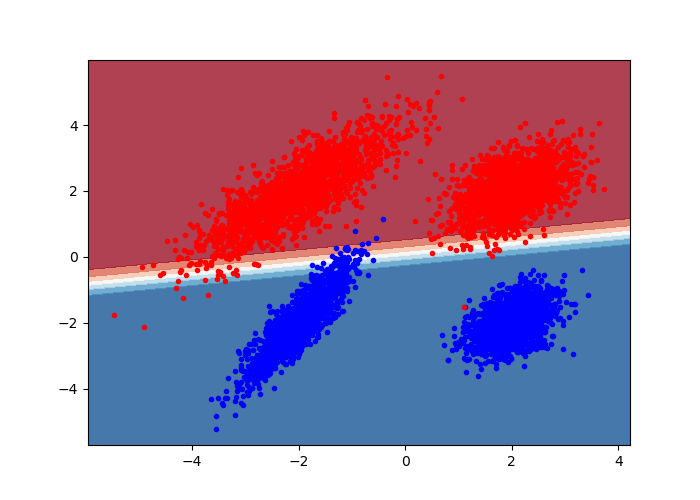

In [30]:
h=0.01
x_min, x_max = X_tr.values[:, 0].min() - .5, X_tr.values[:, 0].max() + .5
y_min, y_max = X_tr.values[:, 1].min() - .5, X_tr.values[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, cmap='RdBu_r', alpha=.8)

plt.plot(X_tr.loc[y_tr==0].feat_1,X_tr.loc[y_tr==0].feat_2,'b.')
plt.plot(X_tr.loc[y_tr==1].feat_1,X_tr.loc[y_tr==1].feat_2,'r.')

In [31]:
Z = svc.decision_function(X_tr)
Z

array([-6.38479456, -3.37635958, -3.22507012, ...,  6.05309523,
        6.50649546,  0.0159815 ])

<IPython.core.display.Javascript object>


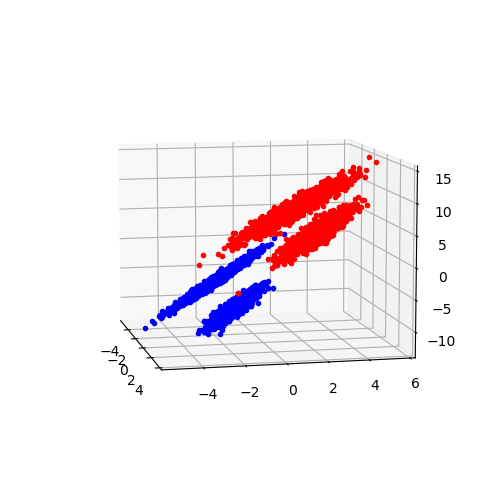

In [32]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

plt.plot(X_tr.loc[y_tr==0].feat_1,X_tr.loc[y_tr==0].feat_2, Z[y_tr==0],'b.')
plt.plot(X_tr.loc[y_tr==1].feat_1,X_tr.loc[y_tr==1].feat_2, Z[y_tr==1],'r.')

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001);

In [33]:
from sklearn.svm import SVC

svc = SVC(C=1., gamma=1, kernel='rbf', probability=True, random_state=61658)
svc.fit(X_tr,y_tr)

SVC(gamma=1, probability=True, random_state=61658)

<IPython.core.display.Javascript object>


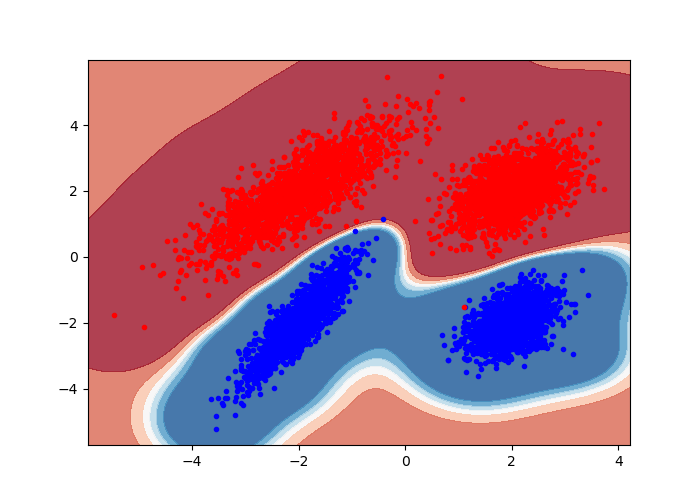

In [34]:
h=0.01
x_min, x_max = X_tr.values[:, 0].min() - .5, X_tr.values[:, 0].max() + .5
y_min, y_max = X_tr.values[:, 1].min() - .5, X_tr.values[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, cmap='RdBu_r', alpha=.8)

plt.plot(X_tr.loc[y_tr==0].feat_1,X_tr.loc[y_tr==0].feat_2,'b.')
plt.plot(X_tr.loc[y_tr==1].feat_1,X_tr.loc[y_tr==1].feat_2,'r.')

<IPython.core.display.Javascript object>


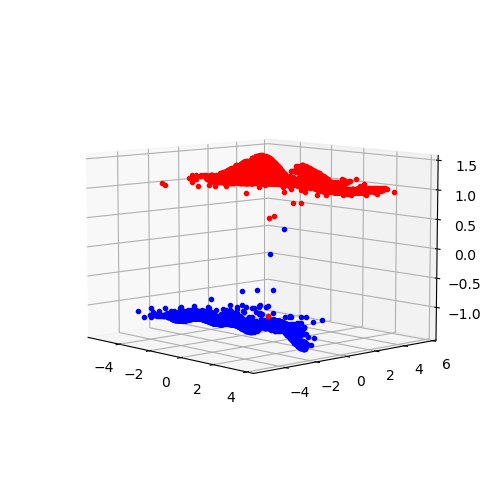

In [11]:
%matplotlib notebook

Z = svc.decision_function(X_tr)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

plt.plot(X_tr.loc[y_tr==0].feat_1,X_tr.loc[y_tr==0].feat_2, Z[y_tr==0],'b.')
plt.plot(X_tr.loc[y_tr==1].feat_1,X_tr.loc[y_tr==1].feat_2, Z[y_tr==1],'r.')


0.1


<IPython.core.display.Javascript object>


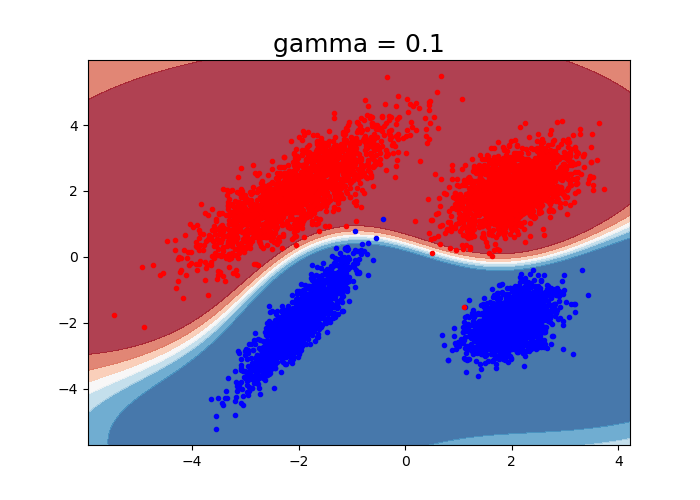

1


<IPython.core.display.Javascript object>


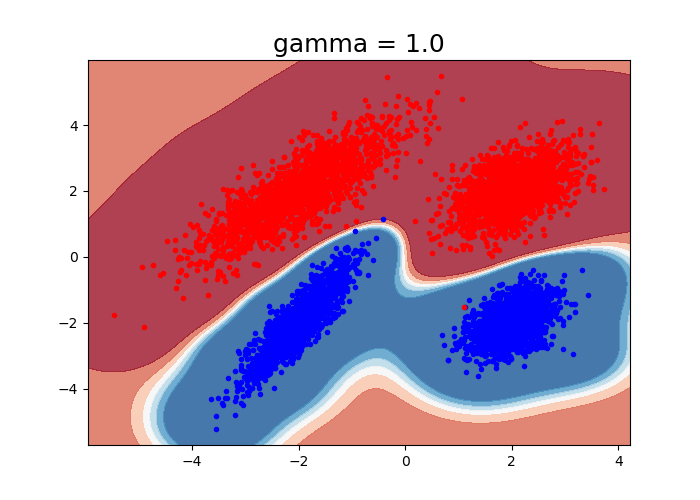

10


<IPython.core.display.Javascript object>


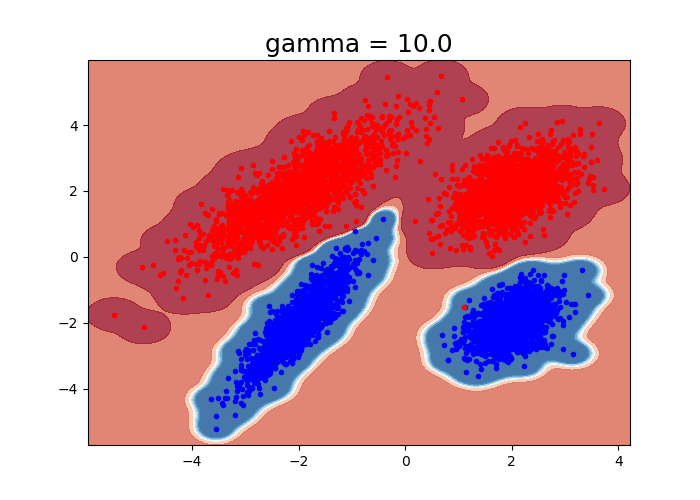

In [12]:
from sklearn.svm import SVC

for gamma in [0.1,1,10]:
    print(gamma)
    svc = SVC(C=1, gamma=gamma, kernel='rbf', probability=True, random_state=61658)
    svc.fit(X_tr,y_tr)
    
    h=0.01
    x_min, x_max = X_tr.values[:, 0].min() - .5, X_tr.values[:, 0].max() + .5
    y_min, y_max = X_tr.values[:, 1].min() - .5, X_tr.values[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap='RdBu_r', alpha=.8)

    plt.plot(X_tr.loc[y_tr==0].feat_1,X_tr.loc[y_tr==0].feat_2,'b.')
    plt.plot(X_tr.loc[y_tr==1].feat_1,X_tr.loc[y_tr==1].feat_2,'r.')
    
    plt.title(f'gamma = {gamma:.1f}',fontsize=18)

0.1


<IPython.core.display.Javascript object>


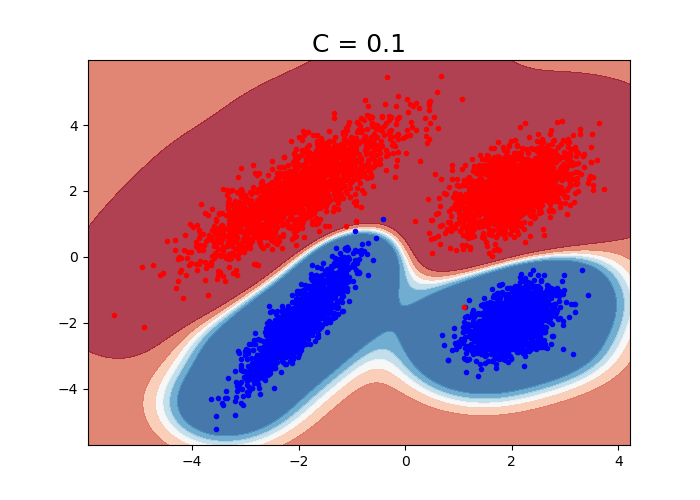

1


<IPython.core.display.Javascript object>


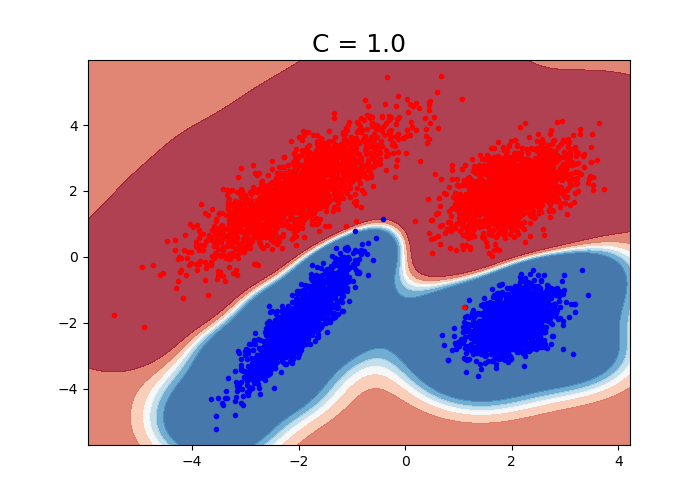

10


<IPython.core.display.Javascript object>


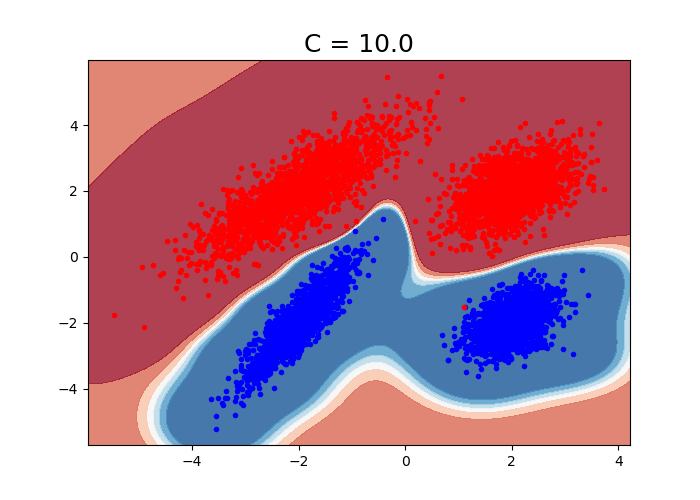

In [13]:
from sklearn.svm import SVC

for C in [1e-1,1,10]:
    print(C)
    svc = SVC(C=C, gamma=1., kernel='rbf', probability=True, random_state=61658)
    svc.fit(X_tr,y_tr)
    
    h=0.01
    x_min, x_max = X_tr.values[:, 0].min() - .5, X_tr.values[:, 0].max() + .5
    y_min, y_max = X_tr.values[:, 1].min() - .5, X_tr.values[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap='RdBu_r', alpha=.8)

    plt.plot(X_tr.loc[y_tr==0].feat_1,X_tr.loc[y_tr==0].feat_2,'b.')
    plt.plot(X_tr.loc[y_tr==1].feat_1,X_tr.loc[y_tr==1].feat_2,'r.')
    
    plt.title(f'C = {C:.1f}',fontsize=18)

<IPython.core.display.Javascript object>


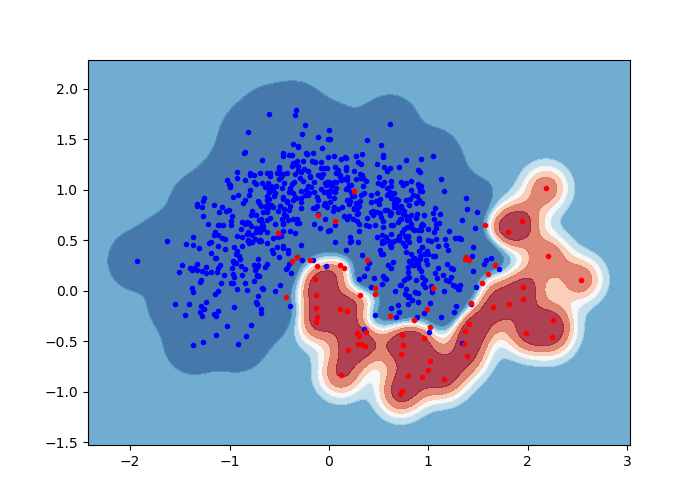

In [15]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=2_000,noise=0.3, random_state=0)
idx = np.random.choice(np.where(y==1)[0], size=int(0.9*np.sum(y==0)), replace=False)
X = np.delete(X,idx, axis=0)
y = np.delete(y,idx)
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.3, random_state=61658)

svc = SVC(C=1, gamma=20, kernel='rbf', probability=True, random_state=61658)

svc.fit(X_tr,y_tr)
preds = svc.predict_proba(X_ts)[:,1]

h=0.01
x_min, x_max = X_tr[:, 0].min() - .5, X_tr[:, 0].max() + .5
y_min, y_max = X_tr[:, 1].min() - .5, X_tr[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, cmap='RdBu_r', alpha=.8)

plt.plot(X_tr[y_tr==0,0],X_tr[y_tr==0,1],'b.')
plt.plot(X_tr[y_tr==1,0],X_tr[y_tr==1,1],'r.')

<IPython.core.display.Javascript object>


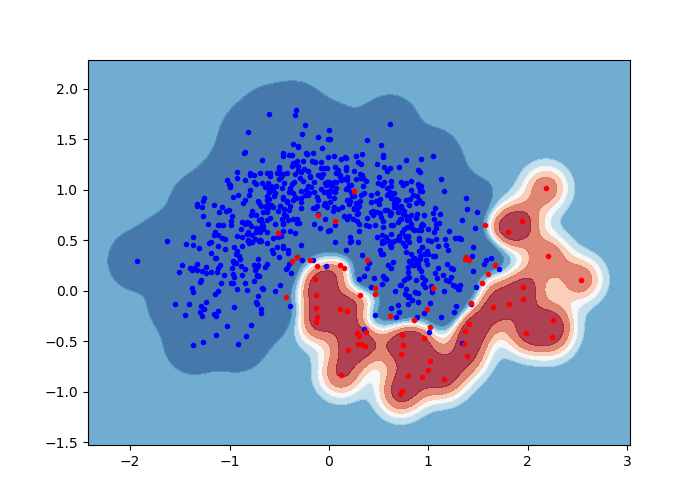

<IPython.core.display.Javascript object>


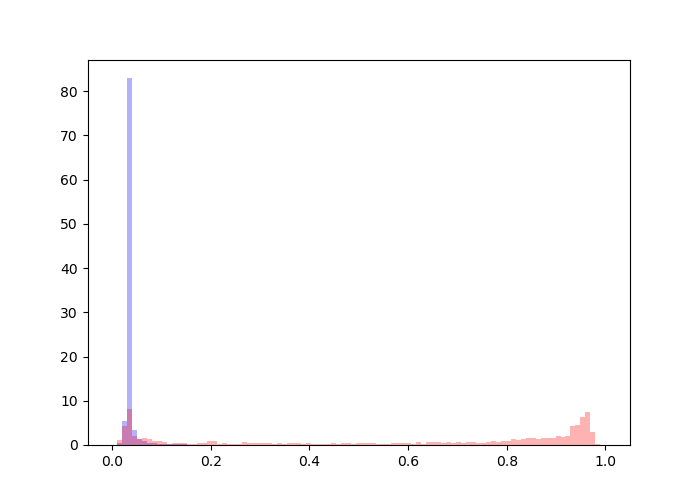

(array([0.    , 1.1484, 4.2372, 8.0784, 2.0592, 1.3662, 1.5642, 1.3464,
        0.9306, 0.891 , 0.6336, 0.3168, 0.495 , 0.495 , 0.4356, 0.3366,
        0.3168, 0.5148, 0.495 , 0.8712, 0.792 , 0.3366, 0.396 , 0.3168,
        0.3168, 0.3168, 0.6138, 0.5148, 0.3762, 0.3564, 0.4158, 0.4158,
        0.1188, 0.3762, 0.2772, 0.3564, 0.3564, 0.4158, 0.2772, 0.4554,
        0.2772, 0.2772, 0.2574, 0.297 , 0.3564, 0.3168, 0.4356, 0.4158,
        0.3366, 0.4752, 0.3762, 0.396 , 0.396 , 0.3366, 0.3168, 0.3366,
        0.4356, 0.495 , 0.4752, 0.5148, 0.2772, 0.6138, 0.3366, 0.6138,
        0.6138, 0.6336, 0.5346, 0.5742, 0.5148, 0.6534, 0.5346, 0.6732,
        0.594 , 0.5544, 0.5346, 0.6534, 0.9702, 0.7722, 0.9108, 0.891 ,
        1.4058, 1.1286, 1.2672, 1.485 , 1.5642, 1.3464, 1.6038, 1.6632,
        1.5444, 1.9602, 1.7622, 2.079 , 4.2174, 4.5936, 6.336 , 7.524 ,
        2.871 , 0.3366, 0.    ]),
 array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.

In [16]:
X,y = make_moons(n_samples=100_000,noise=0.3, random_state=0)
idx = np.random.choice(np.where(y==1)[0], size=int(0.9*np.sum(y==0)), replace=False)
X = np.delete(X,idx, axis=0)
y = np.delete(y,idx)
preds = svc.predict_proba(X)[:,1]

plt.figure(figsize=(7,5))
h=0.01
x_min, x_max = X_tr[:, 0].min() - .5, X_tr[:, 0].max() + .5
y_min, y_max = X_tr[:, 1].min() - .5, X_tr[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='RdBu_r', alpha=.8)
plt.plot(X_tr[y_tr==0,0],X_tr[y_tr==0,1],'b.')
plt.plot(X_tr[y_tr==1,0],X_tr[y_tr==1,1],'r.')

plt.figure(figsize=(7,5))
plt.hist(preds[y==0],color='b',density=True,bins=np.linspace(0,1,100),alpha=.3)
plt.hist(preds[y==1],color='r',density=True,bins=np.linspace(0,1,100),alpha=.3)

# Agora com dados reais

In [35]:
df = pd.read_csv('svm.csv')
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1,1


In [36]:
y.mean()

0.5

In [18]:
X = df.drop('Exited',axis=1)
y = df.Exited

from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.3,random_state=61658)

from sklearn.preprocessing import RobustScaler

rs = RobustScaler(quantile_range=(5.,95.))
X_tr2 = rs.fit_transform(X_tr)
X_ts2 = rs.transform(X_ts)

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {
    'C': np.logspace(-7,7,10,base=2),
    'gamma': np.logspace(-7,3,10,base=2),
    'class_weight': [None,'balanced'],
}

svc = SVC(kernel='rbf', probability=True,random_state=61658)

grid = GridSearchCV(svc,params, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)

In [19]:
grid.fit(X_tr2,y_tr)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=61658),
             n_jobs=-1,
             param_grid={'C': array([7.81250000e-03, 2.29646014e-02, 6.75037337e-02, 1.98425131e-01,
       5.83264520e-01, 1.71448797e+00, 5.03968420e+00, 1.48139954e+01,
       4.35452800e+01, 1.28000000e+02]),
                         'class_weight': [None, 'balanced'],
                         'gamma': array([7.81250000e-03, 1.68759334e-02, 3.64540325e-02, 7.87450656e-02,
       1.70098750e-01, 3.67433623e-01, 7.93700526e-01, 1.71448797e+00,
       3.70349885e+00, 8.00000000e+00])},
             scoring='roc_auc', verbose=10)

In [20]:
grid.best_params_

{'C': 128.0, 'class_weight': 'balanced', 'gamma': 0.03645403248675365}

In [25]:
np.log2(0.03645403248675365)

-4.777777777777778

0.8451979166666667


<IPython.core.display.Javascript object>


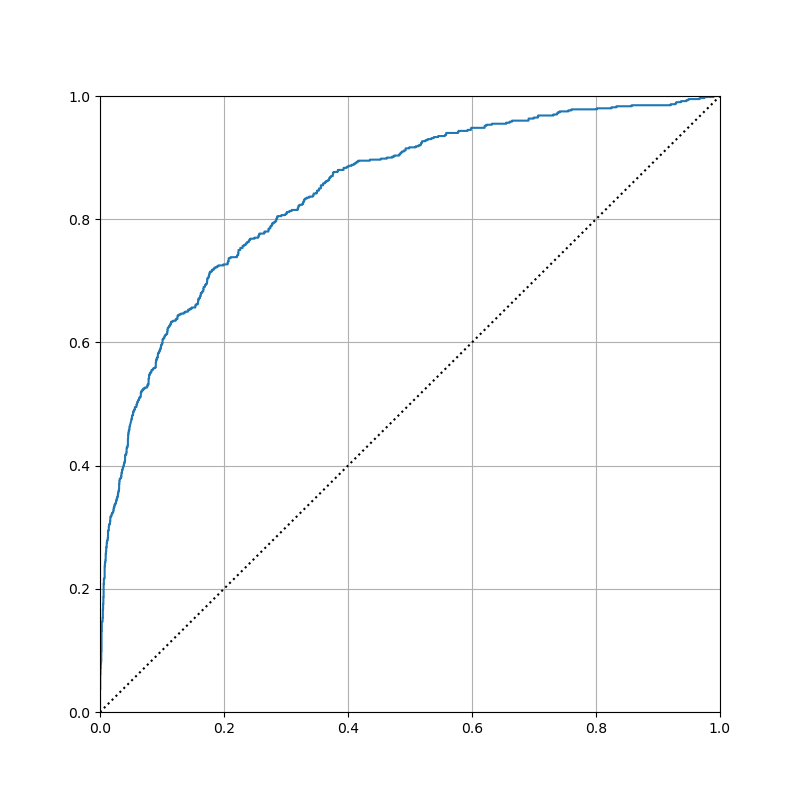

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

print(roc_auc_score(y_ts, grid.predict_proba(X_ts2)[:,1]))
fpr, tpr, ths = roc_curve(y_ts, grid.predict_proba(X_ts2)[:,1])
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot((0,1),(0,1),'k:')
plt.grid();

<IPython.core.display.Javascript object>


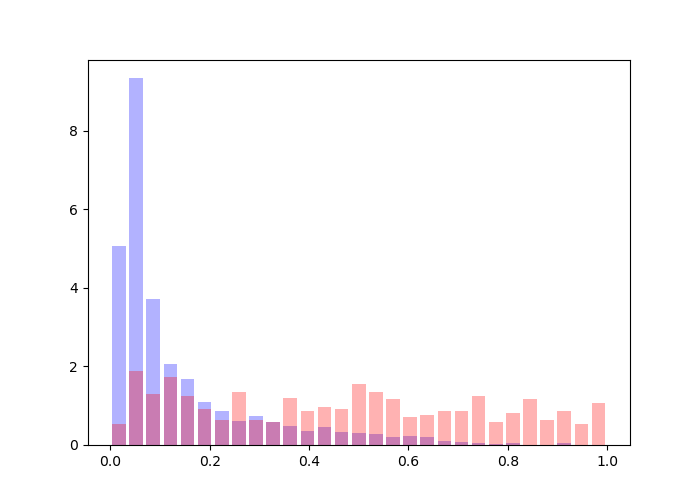

(array([0.53166667, 1.885     , 1.305     , 1.74      , 1.25666667,
        0.91833333, 0.62833333, 1.35333333, 0.62833333, 0.58      ,
        1.20833333, 0.87      , 0.96666667, 0.91833333, 1.54666667,
        1.35333333, 1.16      , 0.725     , 0.77333333, 0.87      ,
        0.87      , 1.25666667, 0.58      , 0.82166667, 1.16      ,
        0.62833333, 0.87      , 0.53166667, 1.06333333]),
 array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
        0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
        0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
        0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
        0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
        0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]),
 <BarContainer object of 29 artists>)

In [23]:
pred = grid.predict_proba(X_ts2)[:,1]

plt.figure(figsize=(7,5))
plt.hist(pred[y_ts==0],color='b',density=True,alpha=.3,rwidth=.8, bins=np.linspace(0,1,30))
plt.hist(pred[y_ts==1],color='r',density=True,alpha=.3,rwidth=.8, bins=np.linspace(0,1,30))